In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
import json

In [3]:
Lost_Columns = [
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'aspect_ratio',
    'cast_total_facebook_likes',
    'color',
    'content_rating',
    'director_facebook_likes',
    'facenumber_in_poster',
    'movie_facebook_likes',
    'movie_imdb_link',
    'num_critic_for_reviews',
    'num_user_for_reviews']

In [4]:
TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES = {
    'budget': 'budget',
    'genres': 'genres',
    'revenue': 'gross',
    'title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users'}

In [5]:
IMDB_COLUMNS_TO_REMAP = {'imdb_score': 'vote_average'}

In [11]:
Movies = pd.read_csv('tmdb_5000_movies.csv')

In [12]:
Movies['release_date'] = pd.to_datetime(Movies['release_date']).apply(lambda x: x.date())

In [13]:
Json_columns_Movies = ['genres', 'keywords', 'production_countries','production_companies', 'spoken_languages']

In [14]:
for column in Json_columns_Movies:
    Movies[column] = Movies[column].apply(json.loads)

In [15]:
Credits = pd.read_csv('tmdb_5000_credits.csv')

In [16]:
Json_columns_Credits = ['cast','crew']

In [17]:
for column in Json_columns_Credits:
    Credits[column] = Credits[column].apply(json.loads)

In [18]:
Movies.rename(columns=TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES,inplace=True)

In [19]:
Movies['Title_Year'] = Movies['release_date'].apply(lambda x : x.year)

In [21]:
def Extract_Details(data,index):
    try:
        for idx in index:
            data = data[idx]
        return data
    except IndexError or KeyError:
        return pd.np.nan

In [23]:
Movies['Country'] = Movies['production_countries'].apply(lambda x :Extract_Details(x,[0,'name']))

In [24]:
Movies['Country']

0       United States of America
1       United States of America
2                 United Kingdom
3       United States of America
4       United States of America
5       United States of America
6       United States of America
7       United States of America
8                 United Kingdom
9       United States of America
10      United States of America
11                United Kingdom
12                       Jamaica
13      United States of America
14                United Kingdom
15                Czech Republic
16      United States of America
17      United States of America
18      United States of America
19                   New Zealand
20      United States of America
21                United Kingdom
22                   New Zealand
23                United Kingdom
24                   New Zealand
25      United States of America
26      United States of America
27      United States of America
28      United States of America
29                United Kingdom
          

In [25]:
Movies['Language'] = Movies['spoken_languages'].apply(lambda x:Extract_Details(x,[0,'name']))

In [26]:
def Get_Director(crew_data):
    directors = [x['name'] for x in crew_data if x['job']=='Director']
    return Extract_Details(directors,[0])
    

In [27]:
Movies['Director'] = Credits['crew'].apply(Get_Director)

In [28]:
Movies['Director']

0            James Cameron
1           Gore Verbinski
2               Sam Mendes
3        Christopher Nolan
4           Andrew Stanton
5                Sam Raimi
6             Byron Howard
7              Joss Whedon
8              David Yates
9              Zack Snyder
10            Bryan Singer
11            Marc Forster
12          Gore Verbinski
13          Gore Verbinski
14             Zack Snyder
15          Andrew Adamson
16             Joss Whedon
17            Rob Marshall
18        Barry Sonnenfeld
19           Peter Jackson
20               Marc Webb
21            Ridley Scott
22           Peter Jackson
23             Chris Weitz
24           Peter Jackson
25           James Cameron
26           Anthony Russo
27              Peter Berg
28         Colin Trevorrow
29              Sam Mendes
               ...        
4773           Kevin Smith
4774         James Bidgood
4775       Andrew Bujalski
4776           Neil LaBute
4777            Eric Eason
4778              Uwe Boll
4

In [30]:
Movies['Actor_1']= Credits['cast'].apply(lambda x:Extract_Details(x,[1,'name']))

In [31]:
Movies['Actor_2']= Credits['cast'].apply(lambda x:Extract_Details(x,[2,'name']))

In [32]:
Movies['Actor_3']= Credits['cast'].apply(lambda x:Extract_Details(x,[3,'name']))

In [33]:
def preprocess(keywords):
    return '|'.join([x['name'] for x in keywords])

In [34]:
Movies['genres'] = Movies['genres'].apply(preprocess)

In [35]:
Movies['plot_keywords'] = Movies['plot_keywords'].apply(preprocess)

In [36]:
Movies

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,movie_title,vote_average,num_voted_users,Title_Year,Country,Language,Director,Actor_1,Actor_2,Actor_3
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,Avatar,7.2,11800,2009.0,United States of America,English,James Cameron,Zoe Saldana,Sigourney Weaver,Stephen Lang
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,Pirates of the Caribbean: At World's End,6.9,4500,2007.0,United States of America,English,Gore Verbinski,Orlando Bloom,Keira Knightley,Stellan Skarsgård
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,Spectre,6.3,4466,2015.0,United Kingdom,Français,Sam Mendes,Christoph Waltz,Léa Seydoux,Ralph Fiennes
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,The Dark Knight Rises,7.6,9106,2012.0,United States of America,English,Christopher Nolan,Michael Caine,Gary Oldman,Anne Hathaway
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,John Carter,6.1,2124,2012.0,United States of America,English,Andrew Stanton,Lynn Collins,Samantha Morton,Willem Dafoe
5,258000000,Fantasy|Action|Adventure,http://www.sonypictures.com/movies/spider-man3/,559,dual identity|amnesia|sandstorm|love of one's ...,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,Spider-Man 3,5.9,3576,2007.0,United States of America,English,Sam Raimi,Kirsten Dunst,James Franco,Thomas Haden Church
6,260000000,Animation|Family,http://disney.go.com/disneypictures/tangled/,38757,hostage|magic|horse|fairy tale|musical|princes...,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,Tangled,7.4,3330,2010.0,United States of America,English,Byron Howard,Mandy Moore,Donna Murphy,Ron Perlman
7,280000000,Action|Adventure|Science Fiction,http://marvel.com/movies/movie/193/avengers_ag...,99861,marvel comic|sequel|superhero|based on comic b...,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{'name': 'Marvel Studios', 'id': 420}, {'name...",...,Avengers: Age of Ultron,7.3,6767,2015.0,United States of America,English,Joss Whedon,Chris Hemsworth,Mark Ruffalo,Chris Evans
8,250000000,Adventure|Fantasy|Family,http://harrypotter.warnerbros.com/harrypottera...,767,witch|magic|broom|school of witchcraft|wizardr...,en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,Harry Potter and the Half-Blood Prince,7.4,5293,2009.0,United Kingdom,English,David Yates,Rupert Grint,Emma Watson,Tom Felton
9,250000000,Action|Adventure|Fantasy,http://www.batmanvsupermandawnofjustice.com/,209112,dc comics|vigilante|superhero|based on comic b...,en,Batman v Superman: Dawn of Justice,Fearing the actions of a go

In [37]:
from nltk.corpus import wordnet

In [38]:
from sklearn import linear_model

In [39]:
import math,nltk,warnings

In [40]:
from fuzzywuzzy import fuzz

c:\users\tony\appdata\local\programs\python\python37\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [41]:
from sklearn.neighbors import NearestNeighbors

In [42]:
from wordcloud import WordCloud ,STOPWORDS

In [43]:
warnings.filterwarnings('ignore')

In [44]:
stemmer = nltk.stem.PorterStemmer()

In [45]:
Movies_Info = pd.DataFrame(Movies.dtypes).T.rename(index={0:'Column Type'})

In [46]:
Movies_Info = Movies_Info.append(pd.DataFrame(Movies.isnull().sum()).T.rename(index = {0:'Null Values Count'}))

In [47]:
Movies_Info = Movies_Info.append(pd.DataFrame(Movies.isnull().sum()/Movies.shape[0]*100).T.rename(index = {0:'Null Values(%)'}))

In [48]:
Movies_Info

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,movie_title,vote_average,num_voted_users,Title_Year,Country,Language,Director,Actor_1,Actor_2,Actor_3
Column Type,int64,object,object,int64,object,object,object,object,float64,object,...,object,float64,int64,float64,object,object,object,object,object,object
Null Values Count,0,0,3091,0,0,0,0,3,0,0,...,0,0,0,1,174,86,30,53,63,93
Null Values(%),0,0,64.3556,0,0,0,0,0.062461,0,0,...,0,0,0,0.0208203,3.62274,1.79055,0.62461,1.10348,1.31168,1.93629


In [49]:
total_keywords = set()

In [50]:
for list_words in Movies['plot_keywords'].str.split('|'):
    if isinstance(list_words,float):continue
    total_keywords = total_keywords.union(list_words)


total_keywords.remove('')

    

In [52]:
len(total_keywords)

9813

In [55]:
def count_keywords(df,ref_col,total_keywords):
    keywords_count =dict()
    for keyword in total_keywords:
        keywords_count[keyword] =0
    for list_words in df[ref_col].str.split('|'):
        if type(list_words) ==float and pd.isnull(list_words):
            continue
        for word in [word for word in list_words if word in total_keywords]:
            if pd.notnull(word):
                keywords_count[word]+=1
    keyword_occurences=[]
    for k,v in keywords_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key= lambda x: x[1],reverse=True)
    return keyword_occurences,keywords_count
        

In [56]:
keyword_occurences,keywords_count= count_keywords(Movies,'plot_keywords',total_keywords)

In [59]:
len(keyword_occurences)

9813

In [61]:
def color_function(word=None,font_size = None,position=None,orientation= None,font_path = None,random_state=None):
    h = int(360*tone/255.0)
    s = int(100.0*255.0/255.0)
    l = int(100.0* float(random_state.randint(70,120))/255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

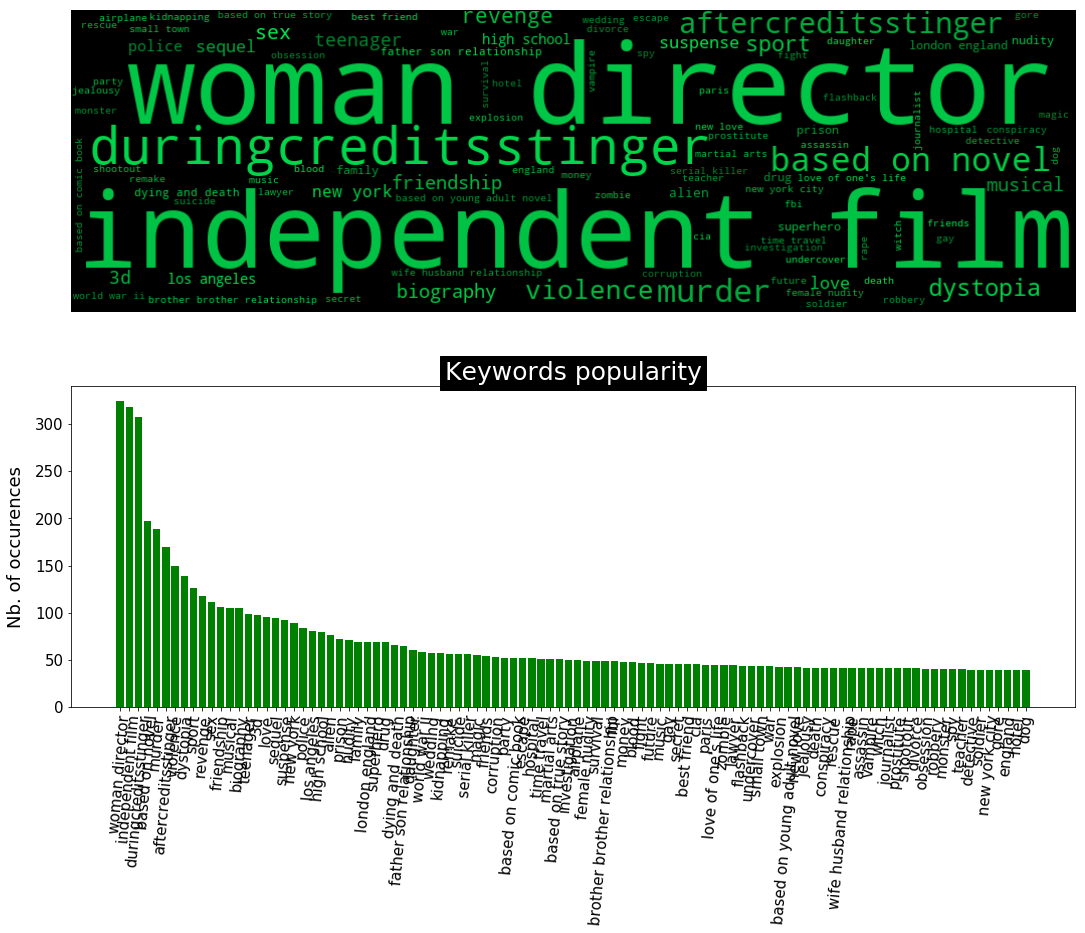

In [62]:
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)
words = dict()
keyword_occurences_sample = keyword_occurences[:100]
for word in keyword_occurences_sample:
    words[word[0]] = word[1]
tone =100
wordcloud = WordCloud(width=1000,height=300, background_color='black',max_words=1628,relative_scaling=1,color_func = color_function,normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud,interpolation='bilinear')
ax1.axis('off')


ax2 = fig.add_subplot(2,1,2)
y = [i[1] for i in keyword_occurences_sample]
x = [k for k,i in enumerate(keyword_occurences_sample)]
x_label = [i[0] for i in keyword_occurences_sample]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x, x_label)
plt.ylabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax2.bar(x, y, align = 'center', color='g')
plt.title("Keywords popularity",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()

In [63]:
missing_df = Movies.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name','Missing Count']
missing_df['Filling Factor'] = (Movies.shape[0]- missing_df['Missing Count'])/Movies.shape[0]*100
missing_df.sort_values('Filling Factor').reset_index(drop = True)

,Column Name,Missing Count,Filling Factor
0,homepage,3091,35.644389
1,tagline,844,82.427649
2,Country,174,96.377264
3,Actor_3,93,98.063710
4,Language,86,98.209452
5,Actor_2,63,98.688320
6,Actor_1,53,98.896523
7,Director,30,99.375390
8,overview,3,99.937539
9,duration,2,99.958359
